### 1) Importamos nuestras librerias y la data

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('datito/data1.csv', index_col=0)

### 2) Exploramos nuestra data

In [52]:
data.head()
#data.info()
#data.describe()
#data.dtypes


,Costo,Descuento,Peso,Tiempo_Exacto
ID,,,,
1,177,44,1233,1
2,216,59,3088,1
3,183,48,3374,1
4,176,10,1177,1
5,184,46,2484,1


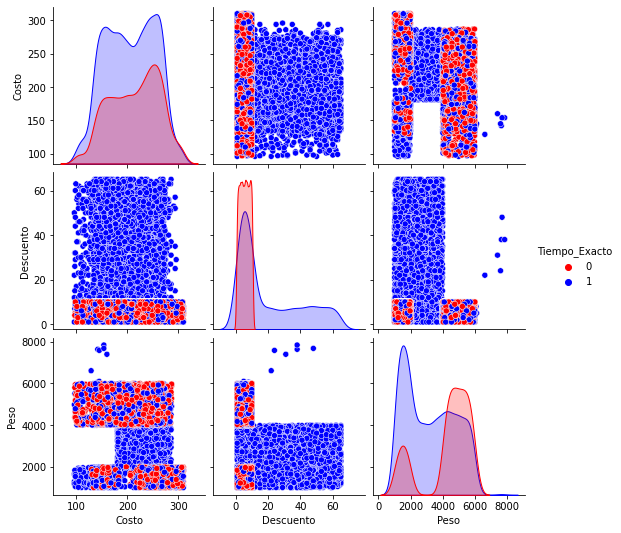

In [53]:
sns.pairplot(data, hue="Tiempo_Exacto", palette = ['r', 'b'])
plt.show()

### 3) Preparamos las variables que relacionaremos 

In [54]:
y = data['Tiempo_Exacto']
X = data[['Descuento', 'Peso', 'Costo']]

El tipo de datos para la ingesta en DTC es acorde al que requiere el modelo

In [55]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


### 4) Separamos la data en train y test y escalamos la data
Separamos la data para poder hacer el entrenamiento y el testeo

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

from sklearn.preprocessing import RobustScaler

sc_X = RobustScaler()

X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

### 5) Elaboramos el arbol de clasificación, entrenamos el modelo y la predicción
* Utilizar árboles de clasificación para explicar y predecir nuestra variable cuantitativa dependiente, en funcion nuestras variables cuantitativas

In [57]:
from sklearn.tree import DecisionTreeClassifier

clt = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, random_state= 42)
# max_depth es la profundidad del arbol que permite controlar el overfitting
# random_state es la semilla para el generador de numeros aleatorios

In [58]:
clt.fit(X_Train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [59]:
y_pred = clt.predict(X_Test)

### 6) Evaluamos los indicadores del modelo

In [60]:
from sklearn.metrics import recall_score

print("El recall del modelo es: ", recall_score(y_test,y_pred))

El recall del modelo es:  0.6559726962457337


In [61]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('la matriz de confusión es: \n', matriz)

la matriz de confusión es: 
 [[608 177]
 [504 961]]


### 5) Graficamos 

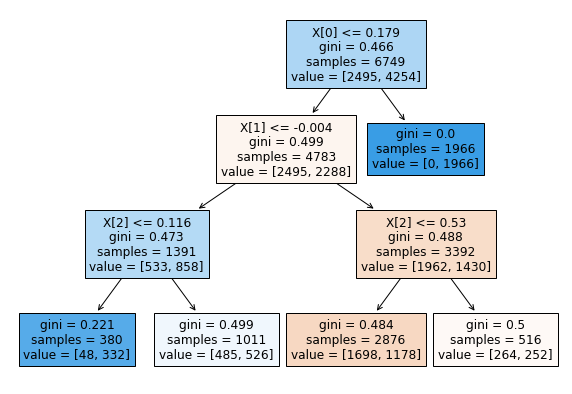

In [62]:
from sklearn import tree
plt.figure(figsize = (10,7))
tree.plot_tree(clt, filled = True)
plt.show()

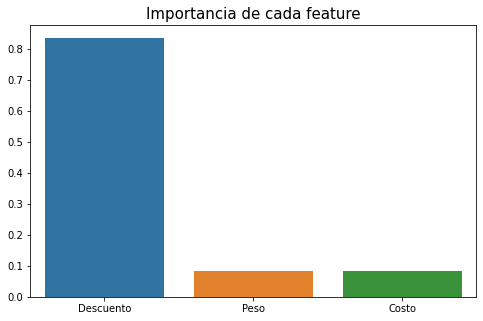

In [63]:
plt.figure(figsize = (8,5))
importances = clt.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()

Evaluamos si nuestra profundida de arbol de decision es la mejor

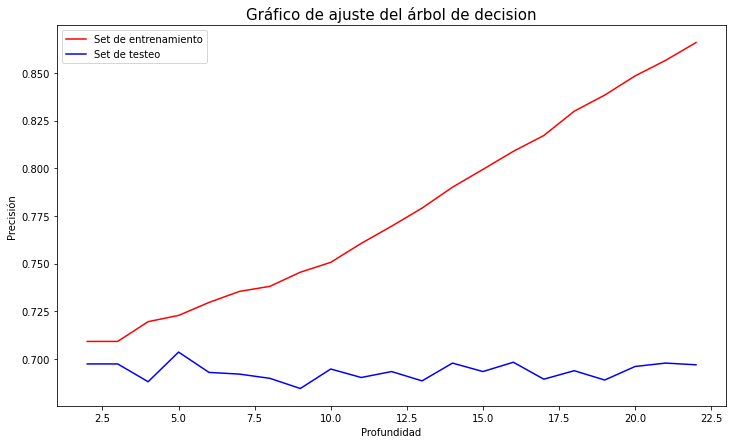

In [64]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(2, 23))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf_3.fit(X_train, y_train)
    train_prec.append(clf_3.score(X_train, y_train))
    eval_prec.append(clf_3.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Precisión')
plt.xlabel('Profundidad')
plt.show()

Como vemos a partir de max_depth=2 la prediccion de nuestro test ya no mejora mucho, entonces la decision de haber elegido max_depth es correcta.

### Optimizando los hiperparámetros
Necesitamos evaluar la combinacion de los distitntos hiperparametros, para lograr de esa manera formular el mejor modelo

In [65]:
param_grid = {'criterion': ['gini', 'entropy', 'mse', 'mae', 'poisson'],
              'max_depth': np.arange(2, 20)}

Creamos el modelo

In [66]:
dtc = DecisionTreeClassifier()

from random import random
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(dtc, param_grid=param_grid, refit=True, cv=5, scoring='f1')

model.fit(X_train, y_train)

c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklea

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'mse', 'mae',
                                       'poisson'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='f1')

In [67]:
print("Mejores hiperparámetros: "+str(model.best_params_)+'\n')
print("Mejor Score: "+str(model.best_score_)+'\n')
print('El recall del modelo es: ', recall_score(y_test, model.predict(X_test)))

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 3}

Mejor Score: 0.7418030942290833

El recall del modelo es:  0.6559726962457337


Esta tabla muestra todas las posibles combinaciones de hiperparametros para el modelo

In [68]:
scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004405,0.000497,0.002202,0.000400,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.758755,0.718791,0.733823,0.756225,0.739187,0.741356,0.014795,3
1,0.004801,0.000399,0.002802,0.000400,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.758755,0.718791,0.733823,0.756225,0.741422,0.741803,0.014756,1
2,0.005605,0.000489,0.002601,0.000489,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.755235,0.684685,0.708333,0.740101,0.718728,0.721416,0.024578,35
3,0.006207,0.000746,0.002802,0.000401,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.767857,0.700213,0.709632,0.746165,0.725588,0.729891,0.024560,21
4,0.007008,0.000007,0.002800,0.000399,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.770289,0.705226,0.708934,0.729010,0.729196,0.728531,0.023115,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.002200,0.000396,0.000000,0.000000,poisson,15,"{'criterion': 'poisson', 'max_depth': 15}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
86,0.002204,0.000406,0.000000,0.000000,poisson,16,"{'criterion': 'poisson', 'max_depth': 16}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
87,0.002001,0.000001,0.000000,0.000000,poisson,17,"{'criterion': 'poisson', 'max_depth': 17}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
88,0.002002,0.000005,0.000000,0.000000,poisson,18,"{'criterion': 'poisson', 'max_depth': 18}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73


In [69]:
#Predecimos en los datos de test con el mejor modelo obtenido
prediction = model.predict(X_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, prediction)

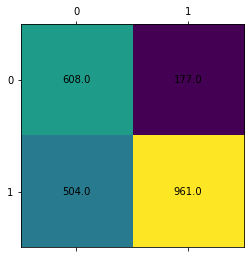

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)

fig, ax = plt.subplots(figsize=(4,5))
ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

In [71]:
from sklearn.metrics import recall_score
print('Recall:', recall_score(y_test, prediction))

# Reporte de Clasificacion
from sklearn.metrics import classification_report
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Recall: 0.6559726962457337
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.55      0.77      0.64       785
           1       0.84      0.66      0.74      1465

    accuracy                           0.70      2250
   macro avg       0.70      0.72      0.69      2250
weighted avg       0.74      0.70      0.70      2250



## Mandamos a crear las predicciones para la data de testeo

In [72]:
datito = pd.read_excel('E-Commerce_test.xlsx')

# Vamos a renombrar las columnas para que sean más fáciles de entender

datito.columns = ['ID', 'Almacen', 'Medio_Transporte', 'Llamadas_Atencion', 'Puntaje_Cliente', 'Costo', 
                'Compras_Previas', 'Nivel_Importancia', 'Genero_Cliente', 'Descuento', 'Peso']

datito.set_index('ID', inplace=True)

In [73]:
datito = datito[['Descuento', 'Peso', 'Costo']]
X_test1 = datito
prediction = model.predict(X_test1)

In [74]:
# crear un dataframe con los resultados

prediction = pd.DataFrame(prediction, columns=['pred'])

In [75]:
# Exportar el dataframe a un archivo csv sin el índice

prediction.to_csv('ELKI-PARIONA-ROJAS2.csv', index=False)